In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

digits = datasets.load_digits()
digits
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [39]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [41]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [43]:
Y =  pd.get_dummies(y).values

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1437, 64), (360, 64), (1437, 10), (360, 10))

In [49]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Input(shape=(64,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(Adam(learning_rate=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,570 (25.66 KB)

 Trainable params: 6,570 (25.66 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1864 - loss: 5.5228 - val_accuracy: 0.3722 - val_loss: 1.6737
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3616 - loss: 1.6018 - val_accuracy: 0.4250 - val_loss: 1.3856
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4765 - loss: 1.3836 - val_accuracy: 0.4750 - val_loss: 1.2790
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5046 - loss: 1.2325 - val_accuracy: 0.5444 - val_loss: 1.1151
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5785 - loss: 1.1141 - val_accuracy: 0.5806 - val_loss: 1.1130
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6258 - loss: 0.9333 - val_accuracy: 0.6389 - val_loss: 0.9117
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7096 - loss: 0.7156 - val_accuracy: 0.7500 - val_loss: 0.6015
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7620 - loss: 0.5611 - val_accuracy: 0.8417 - val_loss

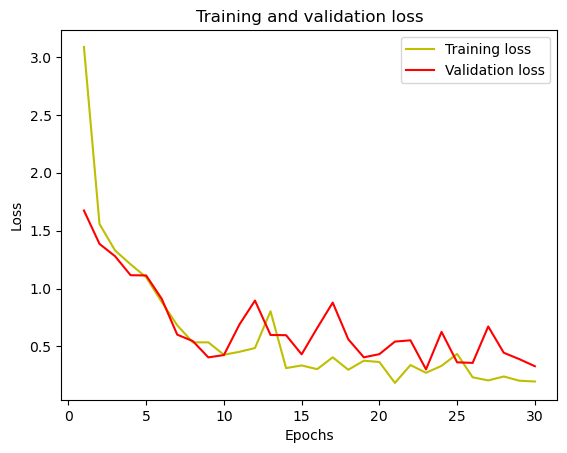

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

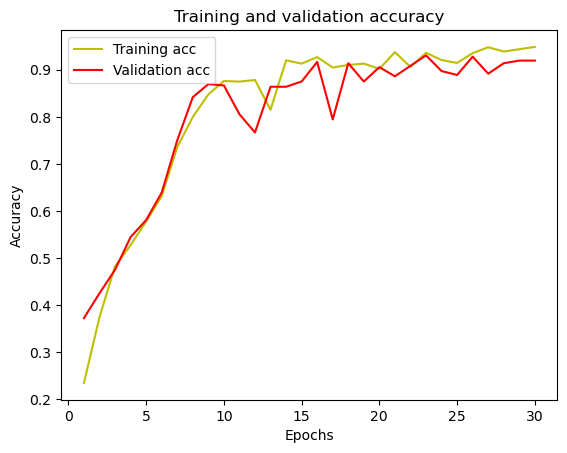

In [53]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [54]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.69      0.89      0.78        35
           2       0.87      0.94      0.91        36
           3       0.96      0.93      0.95        29
           4       1.00      1.00      1.00        30
           5       0.97      0.97      0.97        40
           6       1.00      0.98      0.99        44
           7       0.97      0.97      0.97        39
           8       0.81      0.64      0.71        39
           9       0.97      0.90      0.94        41

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  2  0  0  0  0  0  2  0]
 [ 0  0 34  0  0  0  0  0  2  0]
 [ 0  0  1 27  0  0  0  0  1  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0